In [2]:
import pandas as pd

df=pd.read_csv('jsrt_metadata.csv')
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [3]:
df.replace('non-nodule',np.nan, inplace=True)
df.replace('unknown',np.nan,inplace=True)
df

NameError: name 'np' is not defined

In [4]:
df.isnull()


,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
242,False,True,True,False,False,True,True,False,True,True
243,False,True,True,False,False,True,True,False,True,True
244,False,True,True,False,False,True,True,False,True,True
245,False,True,True,False,False,True,True,False,True,True


In [5]:

df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state         0
position     93
diagnosis    93
dtype: int64

In [6]:
import numpy as np

s=df['size'].astype('float').mean()
s=int(s)
df['size'].replace(np.nan,s,inplace=True)

x=df['x'].astype('float').mean()
x=int(x)
df['x'].replace(np.nan,x,inplace=True)

y=df['y'].astype('float').mean()
y=int(y)
df['y'].replace(np.nan,y,inplace=True)

st=df['subtlety'].value_counts().idxmax()
df['subtlety'].replace(np.nan,st,inplace=True)

d=df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,d,inplace=True)

p=df['position'].value_counts().idxmax()
df['position'].replace(np.nan,p,inplace=True)


mx=df['state'].value_counts().idxmax()
df['state'].replace(np.nan,mx,inplace=True)



df['diagnosis'].value_counts()

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

(array([30.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <BarContainer object of 10 artists>)

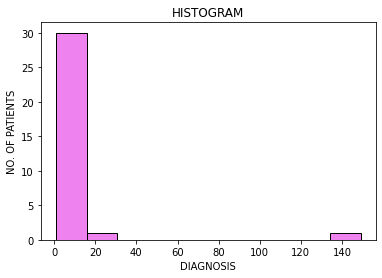

In [7]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.title('HISTOGRAM')
plt.pyplot.xlabel('DIAGNOSIS')
plt.pyplot.ylabel('NO. OF PATIENTS')
plt.pyplot.hist(df['diagnosis'].value_counts(),color='violet',ec='black')


In [8]:
df[['diagnosis','gender']].value_counts()

diagnosis                                       gender
lung cancer                                     Male      75
                                                Female    74
lung cancer(adenocarcinoma)                     Female    15
tuberculoma                                     Male       9
lung cancer(adenocarcinoma)                     Male       8
granuloma                                       Male       6
tuberculoma                                     Female     5
unknown                                         Female     4
lung cancer(bronchioloalveolar cell carcinoma)  Female     4
pulmonary tuberculosis                          Male       3
lung cancer(bronchioloalveolar cell carcinoma)  Male       3
metastasis of colon cancer                      Female     3
Cryptococcosis                                  Female     2
hamartoma                                       Female     2
inflammatory mass                               Male       2
                              

([<matplotlib.patches.Wedge at 0x2718d713d30>,
 [Text(0.027978779917502132, -1.0996441187376615, ''),
  Text(0.08386393602298306, -1.0967984501423829, ''),
  Text(0.12564327252603183, -1.0928008821688193, ''),
  Text(0.22231246450622655, -1.0773008716812438, ''),
  Text(0.33059105794466737, -1.0491470594759469, ''),
  Text(0.38351668268902156, -1.0309776690594266, ''),
  Text(0.4354498396330246, -1.0101403056821232, ''),
  Text(0.48625613570236004, -0.9866888924538515, ''),
  Text(0.5235421444077157, -0.9674211197968393, ''),
  Text(0.5479793660068986, -0.9537917039011599, ''),
  Text(1.0962429459722334, -0.09083723579083222, ''),
  Text(-0.26324732157874087, 1.0680359767730763, ''),
  Text(-1.0786928958362405, 0.21545680883282808, ''),
  Text(-1.0949989339883186, -0.10477277587448951, ''),
  Text(-1.0758652787307668, -0.22915911943793454, ''),
  Text(-1.0591268866243095, -0.2970694161799515, ''),
  Text(-1.0285178263072743, -0.3900654829232648, ''),
  Text(-1.0073506127108325, -0.4418

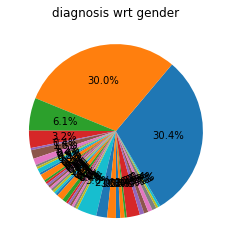

In [9]:
plt.pyplot.title('diagnosis wrt gender',color='black')
plt.pyplot.pie(df.groupby('diagnosis')['gender'].value_counts(),autopct='%1.1f%%',startangle=270)


In [10]:
df[['diagnosis','state']].value_counts()


diagnosis                                       state     
lung cancer                                     non-nodule    93
                                                malignant     56
lung cancer(adenocarcinoma)                     malignant     23
tuberculoma                                     benign        14
granuloma                                       benign         8
lung cancer(bronchioloalveolar cell carcinoma)  malignant      7
metastasis of colon cancer                      malignant      4
unknown                                         benign         4
inflammatory mass                               benign         4
pulmonary tuberculosis                          benign         3
lung abscess                                    benign         2
Inflammatory mass                               benign         2
susp. inflammatory mass                         benign         2
sclerosing hemangioma                           benign         2
pulmonary hematoma             

([<matplotlib.patches.Wedge at 0x2718d866e50>,
 [Text(0.027978779917502132, -1.0996441187376615, ''),
  Text(0.08386393602298306, -1.0967984501423829, ''),
  Text(0.12564327252603183, -1.0928008821688193, ''),
  Text(0.24964196191822735, -1.0712977601253624, ''),
  Text(0.38351668268902156, -1.0309776690594266, ''),
  Text(0.4610021349601745, -0.9987377191045511, ''),
  Text(0.5358040939230666, -0.9606841171453194, ''),
  Text(1.088254003173798, 0.16032225228022315, ''),
  Text(-0.4987661641512051, 0.9804245577798902, ''),
  Text(-1.0949989450240396, 0.10477266053814036, ''),
  Text(-1.0758653001861875, -0.22915901870815555, ''),
  Text(-1.047023465108341, -0.337256376533525, ''),
  Text(-1.007350656666871, -0.44186497316807544, ''),
  Text(-0.9957858020661123, -0.46734423758461957, ''),
  Text(-0.9772328540002837, -0.5049910385961918, ''),
  Text(-0.9572572701258134, -0.5419026838753207, ''),
  Text(-0.9208831199740244, -0.601642983294002, ''),
  Text(-0.8807858757667348, -0.658950863

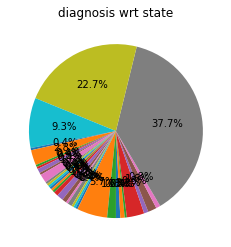

In [11]:
plt.pyplot.title('diagnosis wrt state')
plt.pyplot.pie(df.groupby('diagnosis')['state'].value_counts(),autopct='%1.1f%%',startangle=270,)

In [12]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [13]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,3.0,17.0,50,Male,937.0,868.0,non-nodule,r.upper lobe(S2),lung cancer
243,JPCNN090.png,3.0,17.0,68,Female,937.0,868.0,non-nodule,r.upper lobe(S2),lung cancer
244,JPCNN091.png,3.0,17.0,81,Male,937.0,868.0,non-nodule,r.upper lobe(S2),lung cancer
245,JPCNN092.png,3.0,17.0,70,Female,937.0,868.0,non-nodule,r.upper lobe(S2),lung cancer


([<matplotlib.patches.Wedge at 0x2718f12cf10>,
 [Text(-0.4182718489772054, 1.0173734124465756, 'malignat'),
  Text(0.4562965625205873, -1.1098619044871736, 'benign')],
 [Text(-0.22814828126029382, 0.5549309522435867, '62.416%'),
  Text(0.2661729948036759, -0.6474194442841845, '37.584%')])

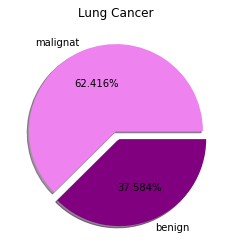

In [39]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer")
plt.pyplot.title("Lung Cancer")
plt.pyplot.pie(a['state'].value_counts(),labels=['malignat','benign'],shadow = True,colors = ['violet','purple']
               ,explode = [0,0.1],autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x2718f1827f0>],
 [Text(-1.1, 1.3471114790620887e-16, 'malignat')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

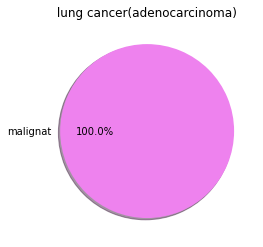

In [40]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(adenocarcinoma)')
plt.pyplot.title(" lung cancer(adenocarcinoma) ")
plt.pyplot.pie(a['state'].value_counts(),labels=['malignat'],shadow = True,colors = ['violet','purple']
               ,explode = [0],autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2718f1c9820>],
 [Text(-1.1, 1.3471114790620887e-16, 'bengin')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

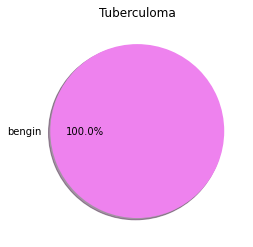

In [41]:
test=df.groupby("diagnosis")
a=test.get_group('tuberculoma')
plt.pyplot.title("Tuberculoma")
plt.pyplot.pie(a['state'].value_counts(),labels=['bengin'],shadow = True,colors = ['violet','purple']
               ,explode = [0],autopct ='%1.1f%%' )


([<matplotlib.patches.Wedge at 0x2718f212850>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

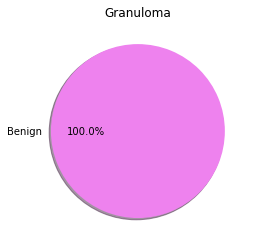

In [42]:
test=df.groupby("diagnosis")
a=test.get_group('granuloma')
plt.pyplot.title("Granuloma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,explode = [0],autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2718f25a940>],
 [Text(-1.1, 1.3471114790620887e-16, 'malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

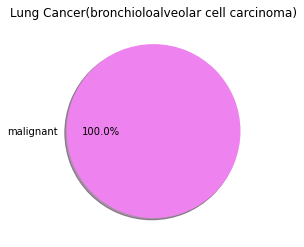

In [43]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(bronchioloalveolar cell carcinoma)')
plt.pyplot.title("Lung Cancer(bronchioloalveolar cell carcinoma)")
plt.pyplot.pie(a['state'].value_counts(),labels=['malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2718f2a2a60>],
 [Text(-0.9010672487178907, -0.6309340799861511, 'malignant')],
 [Text(-0.49149122657339483, -0.3441458618106279, '100.0%')])

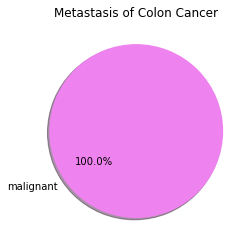

In [44]:
test=df.groupby("diagnosis")
a=test.get_group('metastasis of colon cancer')
plt.pyplot.title("Metastasis of Colon Cancer")
plt.pyplot.pie(a['state'].value_counts(),startangle = 35,labels=['malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2718f0e1d60>],
 [Text(-0.9010672487178907, -0.6309340799861511, 'Benign')],
 [Text(-0.49149122657339483, -0.3441458618106279, '100.000%')])

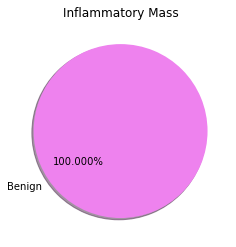

In [38]:
test=df.groupby("diagnosis")
a=test.get_group('inflammatory mass')
plt.pyplot.title("Inflammatory Mass")
plt.pyplot.pie(a['state'].value_counts(),startangle = 35,labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2718f336af0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

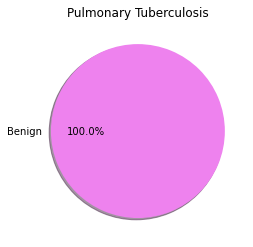

In [46]:
test=df.groupby("diagnosis")
a=test.get_group('pulmonary tuberculosis')
plt.pyplot.title("Pulmonary Tuberculosis")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2718f3c6b80>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

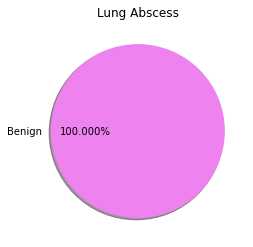

In [48]:
test=df.groupby("diagnosis")
a=test.get_group('lung abscess')
plt.pyplot.title("Lung Abscess")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple'
                                                                                  
                                                                                ]
              ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271903e0c70>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

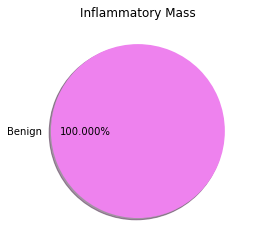

In [49]:
test=df.groupby("diagnosis")
a=test.get_group('Inflammatory mass')
plt.pyplot.title("Inflammatory Mass")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
           ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x27190470c70>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

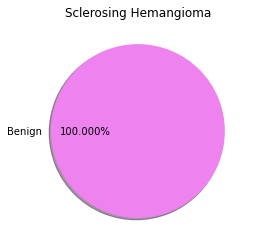

In [52]:
test=df.groupby("diagnosis")
a=test.get_group('sclerosing hemangioma')
plt.pyplot.title("Sclerosing Hemangioma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271904b8ee0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

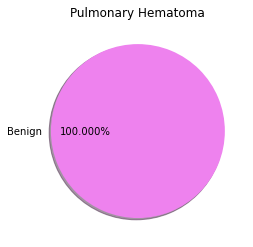

In [53]:
test=df.groupby("diagnosis")
a=test.get_group('pulmonary hematoma')
plt.pyplot.title("Pulmonary Hematoma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x27190501fd0>],
 [Text(-0.9010672487178907, -0.6309340799861511, 'Benign')],
 [Text(-0.49149122657339483, -0.3441458618106279, '100.000%')])

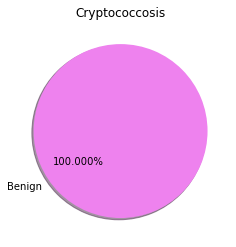

In [54]:
test=df.groupby("diagnosis")
a=test.get_group('Cryptococcosis')
plt.pyplot.title("Cryptococcosis")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%',startangle = 35 )

([<matplotlib.patches.Wedge at 0x27190558100>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

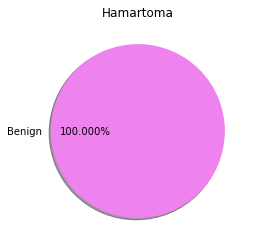

In [55]:
test=df.groupby("diagnosis")
a=test.get_group('hamartoma')
plt.pyplot.title("Hamartoma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
            ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x2719059f160>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

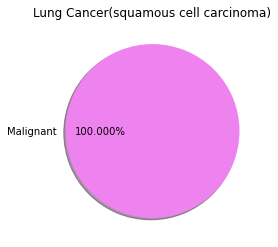

In [56]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(squamous cell carcinoma)')
plt.pyplot.title("Lung Cancer(squamous cell carcinoma)")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
        ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271905e8190>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

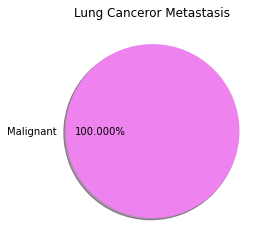

In [57]:
test=df.groupby("diagnosis")
a=test.get_group('lung canceror metastasis')
plt.pyplot.title("Lung Canceror Metastasis")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
             ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271906292e0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

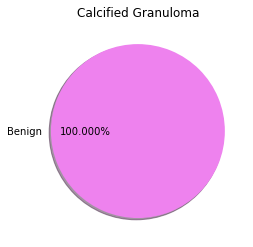

In [58]:
test=df.groupby("diagnosis")
a=test.get_group('calcified granuloma')
plt.pyplot.title("Calcified Granuloma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x27190672250>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

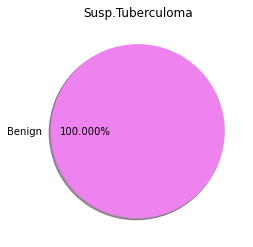

In [59]:
test=df.groupby("diagnosis")
a=test.get_group('susp.tuberculoma')
plt.pyplot.title("Susp.Tuberculoma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x271906ba220>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

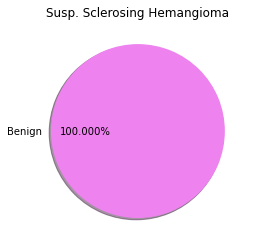

In [60]:
test=df.groupby("diagnosis")
a=test.get_group('susp. sclerosing hemangioma')
plt.pyplot.title("Susp. Sclerosing Hemangioma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x27190702280>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

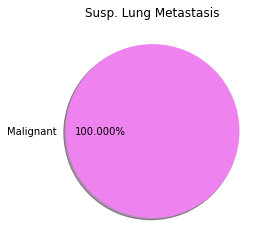

In [61]:
test=df.groupby("diagnosis")
a=test.get_group('susp. lung metastasis')
plt.pyplot.title("Susp. Lung Metastasis")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x2719074b250>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

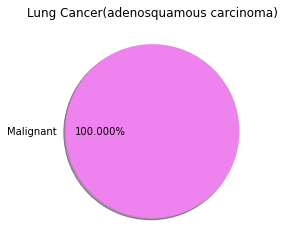

In [62]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(adenosquamous carcinoma)')
plt.pyplot.title("Lung Cancer(adenosquamous carcinoma)")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
             ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x27190793430>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

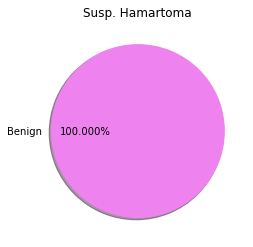

In [63]:
test=df.groupby("diagnosis")
a=test.get_group('susp. hamartoma')
plt.pyplot.title("Susp. Hamartoma")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271907da3a0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

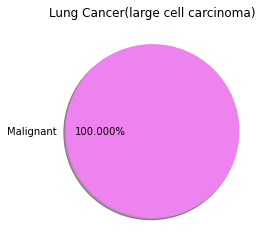

In [64]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(large cell carcinoma)')
plt.pyplot.title("Lung Cancer(large cell carcinoma)")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x271908214c0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

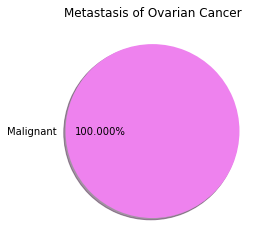

In [65]:
test=df.groupby("diagnosis")
a=test.get_group('metastasis of ovarian cancer')
plt.pyplot.title("Metastasis of Ovarian Cancer")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x2719086a4c0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

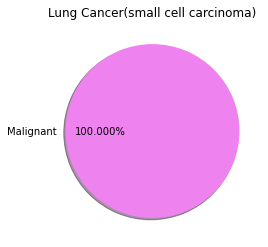

In [66]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(small cell carcinoma)')
plt.pyplot.title("Lung Cancer(small cell carcinoma)")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x271908b6580>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

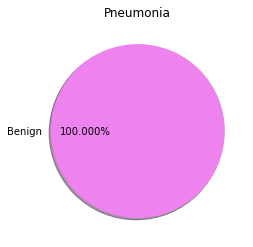

In [67]:
test=df.groupby("diagnosis")
a=test.get_group('pneumonia')
plt.pyplot.title("Pneumonia")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x271908fd5b0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

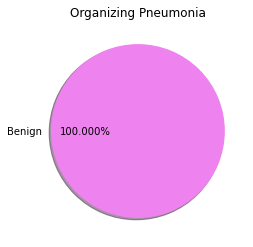

In [68]:
test=df.groupby("diagnosis")
a=test.get_group('organizing pneumonia')
plt.pyplot.title("Organizing Pneumonia")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
             ,autopct ='%1.3f%%' )

([<matplotlib.patches.Wedge at 0x271909a3af0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

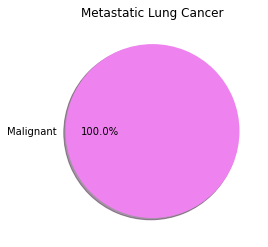

In [70]:
test=df.groupby("diagnosis")
a=test.get_group('metastatic lung cancer')
plt.pyplot.title("Metastatic Lung Cancer")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x271909eabe0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Malignant')],
 [Text(-0.6, 7.347880794884119e-17, '100.000%')])

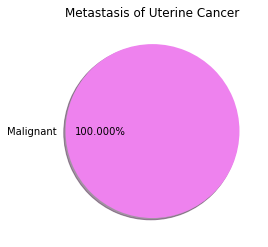

In [71]:
test=df.groupby("diagnosis")
a=test.get_group('metastasis of uterine cancer')
plt.pyplot.title("Metastasis of Uterine Cancer")
plt.pyplot.pie(a['state'].value_counts(),labels=['Malignant'],shadow = True,colors = ['violet','purple']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190a2fd00>],
 [Text(-1.1, 1.3471114790620887e-16, 'Benign')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

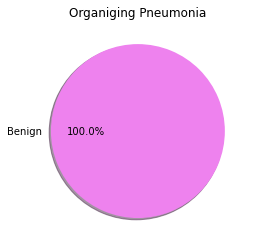

In [72]:
test=df.groupby("diagnosis")
a=test.get_group('organiging pneumonia')
plt.pyplot.title("Organiging Pneumonia")
plt.pyplot.pie(a['state'].value_counts(),labels=['Benign'],shadow = True,colors = ['violet','purple']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190a77d60>,
 [Text(-0.011596189353831868, 1.0999388748437207, 'Male'),
  Text(0.011596086370122407, -1.0999388759294295, 'Female')],
 [Text(-0.0063251941929992, 0.5999666590056658, '50.3%'),
  Text(0.006325138020066767, -0.5999666595978705, '49.7%')])

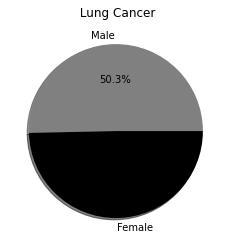

In [73]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer')
plt.pyplot.title(" Lung Cancer")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','black']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190acc760>,
 [Text(-0.5060716130681925, 0.9766737031611724, 'Male'),
  Text(0.5060717045109816, -0.9766736557793242, 'Female')],
 [Text(-0.2760390616735595, 0.5327311108151849, '65.2%'),
  Text(0.2760391115514445, -0.5327310849705404, '34.8%')])

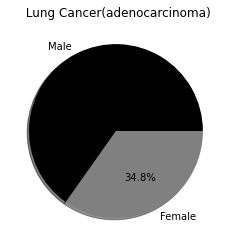

In [74]:
test=df.groupby("diagnosis")
a=test.get_group('lung cancer(adenocarcinoma)')
plt.pyplot.title(" Lung Cancer(adenocarcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190b28190>,
 [Text(-0.47727208651780745, 0.9910657674599294, 'Male'),
  Text(0.4772720865178069, -0.9910657674599296, 'Female')],
 [Text(-0.26033022900971314, 0.5405813277054159, '64.3%'),
  Text(0.2603302290097128, -0.5405813277054161, '35.7%')])

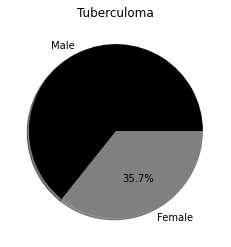

In [75]:
test=df.groupby("diagnosis")
a=test.get_group('tuberculoma')
plt.pyplot.title("Tuberculoma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190b6fc40>,
 [Text(-0.5060716130681925, 0.9766737031611724, 'Male'),
  Text(0.5060717045109816, -0.9766736557793242, 'Female')],
 [Text(-0.2760390616735595, 0.5327311108151849, '65.217%'),
  Text(0.2760391115514445, -0.5327310849705404, '34.783%')])

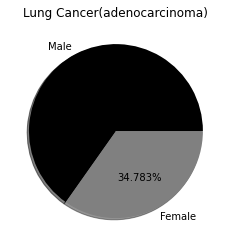

In [76]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(adenocarcinoma)")
plt.pyplot.title("Lung Cancer(adenocarcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x27190c61ac0>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Male'),
  Text(0.7778174593052022, -0.7778174593052025, 'Female')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

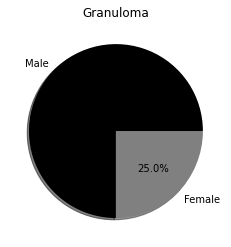

In [79]:
test=df.groupby("diagnosis")
a=test.get_group("granuloma")
plt.pyplot.title("Granuloma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27190cba400>,
 [Text(-0.47727208651780745, 0.9910657674599294, 'Male'),
  Text(0.4772720865178069, -0.9910657674599296, 'Female')],
 [Text(-0.26033022900971314, 0.5405813277054159, '64.3%'),
  Text(0.2603302290097128, -0.5405813277054161, '35.7%')])

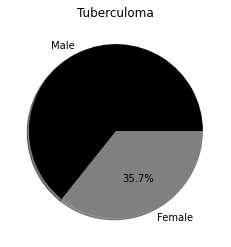

In [80]:
test=df.groupby("diagnosis")
a=test.get_group("tuberculoma")
plt.pyplot.title("Tuberculoma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x27190d47f40>,
 [Text(-0.24477311341532162, 1.0724206837565984, 'Male'),
  Text(0.24477321382259096, -1.072420660839281, 'Female')],
 [Text(-0.13351260731744813, 0.5849567365945082, '57.143%'),
  Text(0.13351266208504958, -0.5849567240941532, '42.857%')])

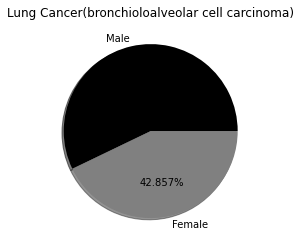

In [82]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(bronchioloalveolar cell carcinoma)")
plt.pyplot.title("Lung Cancer(bronchioloalveolar cell carcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.3f%%')

([<matplotlib.patches.Wedge at 0x2718ebabc70>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

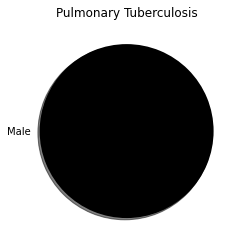

In [83]:
test=df.groupby("diagnosis")
a=test.get_group("pulmonary tuberculosis")
plt.pyplot.title("Pulmonary Tuberculosis")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27191da74f0>,
 [Text(-0.24477311341532162, 1.0724206837565984, 'Male'),
  Text(0.24477321382259096, -1.072420660839281, 'Female')],
 [Text(-0.13351260731744813, 0.5849567365945082, '57.1%'),
  Text(0.13351266208504958, -0.5849567240941532, '42.9%')])

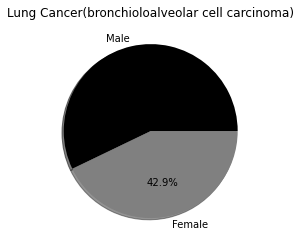

In [85]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(bronchioloalveolar cell carcinoma)")
plt.pyplot.title("Lung Cancer(bronchioloalveolar cell carcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
            ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27191df1f70>,
 [Text(-1.0832885283134288, 0.19101299543362377, 'Male'),
  Text(1.0832885283134288, -0.19101299543362343, 'Female')],
 [Text(-0.5908846518073247, 0.1041889066001584, '75.0%'),
  Text(0.5908846518073247, -0.10418890660015823, '25.0%')])

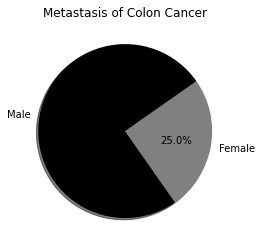

In [86]:
test=df.groupby("diagnosis")
a=test.get_group("metastasis of colon cancer")
plt.pyplot.title("Metastasis of Colon Cancer")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%',startangle = 35 )

([<matplotlib.patches.Wedge at 0x27191e478b0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

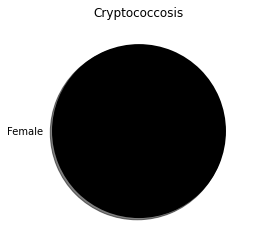

In [87]:
test=df.groupby("diagnosis")
a=test.get_group("Cryptococcosis")
plt.pyplot.title("Cryptococcosis")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['black','grey']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27191e8fa30>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

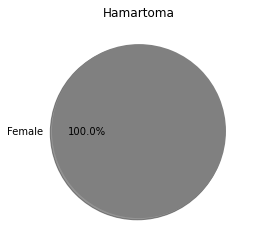

In [88]:
test=df.groupby("diagnosis")
a=test.get_group("hamartoma")
plt.pyplot.title("Hamartoma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27191ed8a90>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

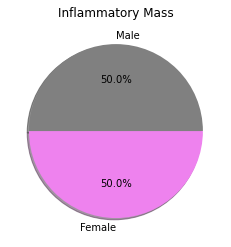

In [89]:
test=df.groupby("diagnosis")
a=test.get_group("inflammatory mass")
plt.pyplot.title("Inflammatory Mass")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x27191f324c0>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Male'),
  Text(0.7778174593052022, -0.7778174593052025, 'Female')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

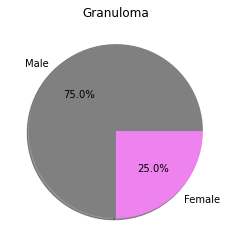

In [90]:
test=df.groupby("diagnosis")
a=test.get_group("granuloma")
plt.pyplot.title("Granuloma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27191fcc9d0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0% ')])

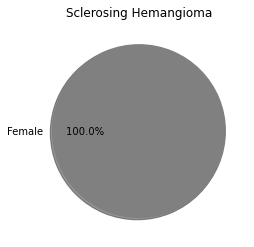

In [93]:
test=df.groupby("diagnosis")
a=test.get_group("sclerosing hemangioma")
plt.pyplot.title("Sclerosing Hemangioma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
              ,autopct ='%1.1f%% ')

([<matplotlib.patches.Wedge at 0x27192014a90>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

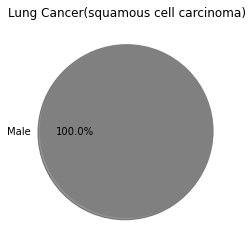

In [94]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(squamous cell carcinoma)")
plt.pyplot.title("Lung Cancer(squamous cell carcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','black']
              ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2719205eac0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

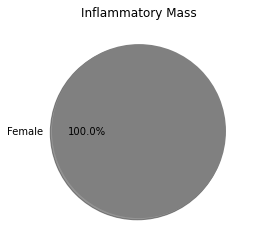

In [95]:
test=df.groupby("diagnosis")
a=test.get_group("Inflammatory mass")
plt.pyplot.title("Inflammatory Mass")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
             ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x271920a7df0>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

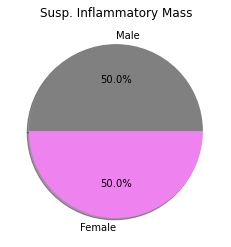

In [96]:
test=df.groupby("diagnosis")
a=test.get_group("susp. inflammatory mass")
plt.pyplot.title("Susp. Inflammatory Mass")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x271920fc610>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

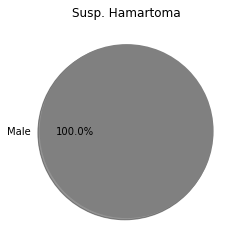

In [97]:
test=df.groupby("diagnosis")
a=test.get_group("susp. hamartoma")
plt.pyplot.title("Susp. Hamartoma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','violet']
             ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2719218fe80>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

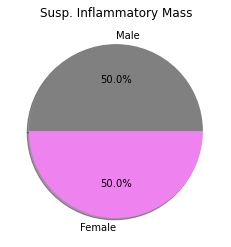

In [99]:
test=df.groupby("diagnosis")
a=test.get_group("susp. inflammatory mass")
plt.pyplot.title("Susp. Inflammatory Mass")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
           ,autopct ='%1.1f%%')


([<matplotlib.patches.Wedge at 0x271921e49a0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

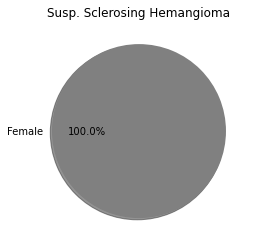

In [100]:
test=df.groupby("diagnosis")
a=test.get_group("susp. sclerosing hemangioma")
plt.pyplot.title("Susp. Sclerosing Hemangioma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
             ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x27192229d30>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

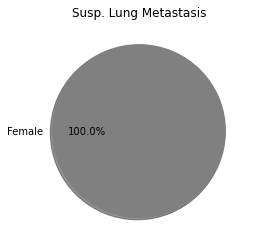

In [101]:
test=df.groupby("diagnosis")
a=test.get_group("susp. lung metastasis")
plt.pyplot.title("Susp. Lung Metastasis")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','black']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x271922cd4c0>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

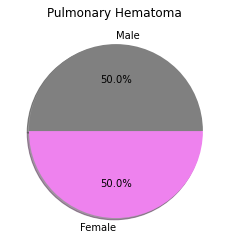

In [103]:
test=df.groupby("diagnosis")
a=test.get_group("pulmonary hematoma")
plt.pyplot.title("Pulmonary Hematoma ")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
            ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192312f70>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

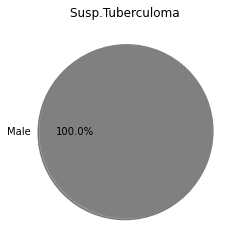

In [104]:
test=df.groupby("diagnosis")
a=test.get_group("susp.tuberculoma")
plt.pyplot.title("Susp.Tuberculoma ")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','violet']
            ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192367070>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

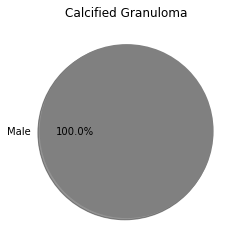

In [105]:
test=df.groupby(by=["diagnosis"])
a=test.get_group("calcified granuloma")
plt.pyplot.title("Calcified Granuloma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x271923f9940>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

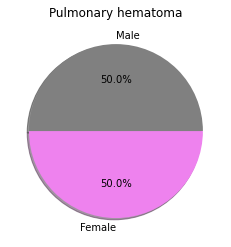

In [107]:
test=df.groupby("diagnosis")
a=test.get_group("pulmonary hematoma")
plt.pyplot.title("Pulmonary hematoma")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x271924523a0>,
 [Text(6.735557395310444e-17, 1.1, 'Male'),
  Text(-2.0206672185931328e-16, -1.1, 'Female')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

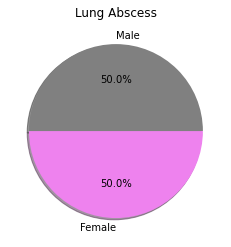

In [108]:
test=df.groupby("diagnosis")
a=test.get_group("lung abscess")
plt.pyplot.title("Lung Abscess")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','violet']
              ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192499f70>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

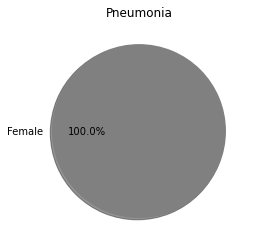

In [109]:
test=df.groupby("diagnosis")
a=test.get_group("pneumonia")
plt.pyplot.title("Pneumonia")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x271924e2ee0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

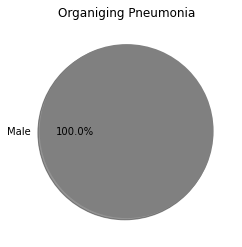

In [110]:
test=df.groupby("diagnosis")
a=test.get_group("organiging pneumonia")
plt.pyplot.title("Organiging Pneumonia")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','violet']
,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192529e20>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

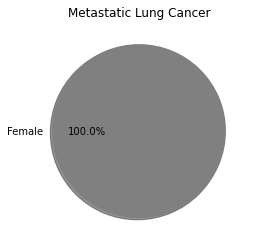

In [111]:
test=df.groupby("diagnosis")
a=test.get_group("metastatic lung cancer")
plt.pyplot.title("Metastatic Lung Cancer")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','violet']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192581040>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

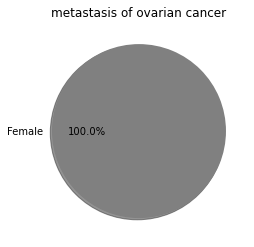

In [112]:
test=df.groupby("diagnosis")
a=test.get_group("metastasis of ovarian cancer")
plt.pyplot.title("metastasis of ovarian cancer")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','purple']
               ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x271925baf70>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Male'),
  Text(0.7778174593052022, -0.7778174593052025, 'Female')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

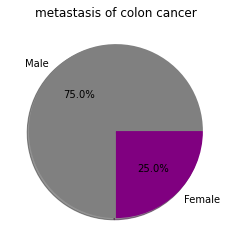

In [113]:
test=df.groupby("diagnosis")
a=test.get_group("metastasis of colon cancer")
plt.pyplot.title("metastasis of colon cancer")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male','Female'],shadow = True,colors = ['grey','purple']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2719260b910>],
 [Text(-1.1, 1.3471114790620887e-16, 'Female')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

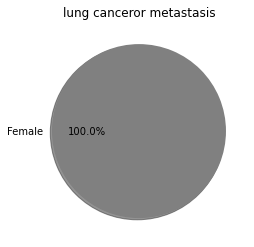

In [114]:
test=df.groupby(["diagnosis"])
a=test.get_group("lung canceror metastasis")
plt.pyplot.title("lung canceror metastasis")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Female'],shadow = True,colors = ['grey','purple']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x2719264a940>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

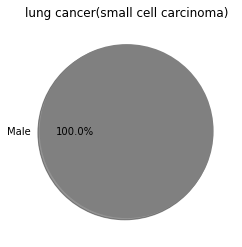

In [115]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(small cell carcinoma)")
plt.pyplot.title("lung cancer(small cell carcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','purple']
               ,autopct ='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27192691a00>],
 [Text(-1.1, 1.3471114790620887e-16, 'Male')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

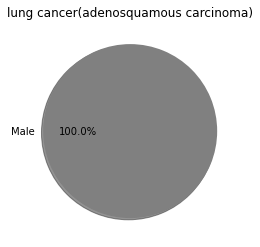

In [116]:
test=df.groupby("diagnosis")
a=test.get_group("lung cancer(adenosquamous carcinoma)")
plt.pyplot.title("lung cancer(adenosquamous carcinoma)")
plt.pyplot.pie(a['gender'].value_counts(),labels=['Male'],shadow = True,colors = ['grey','purple','blue']
              ,autopct ='%1.1f%%')

([<matplotlib.patches.Wedge at 0x271936aaa60>],
 [Text(-1.1, 1.3471114790620887e-16, 'FeMale')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

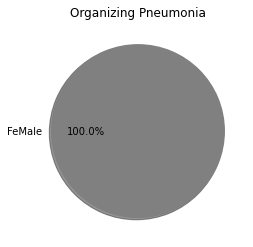

In [117]:
test=df.groupby("diagnosis")
a=test.get_group("organizing pneumonia")
plt.pyplot.title("Organizing Pneumonia")
plt.pyplot.pie(a['gender'].value_counts(),labels=['FeMale'],shadow = True,colors = ['grey','purple']
               ,autopct ='%1.1f%%' )